## Qiskit ➡️ QIR ## 

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer, Aer
from qiskit_qir import to_qir

In [2]:
backend = BasicAer.get_backend("qasm_simulator")
q = QuantumRegister(3, "q")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c0, c1, c2, name="teleport")

In [3]:
def state_initialize (qc, msg):
    if msg == 1: qc.initialize([0,1], 0)

def teleportation(qc):
    qc.h(q[1])
    qc.cx(q[1], q[2])
    qc.cx(q[0], q[1])
    qc.h(q[0])
    qc.measure(q[0], c0[0])
    qc.measure(q[1], c1[0])
    qc.z(q[2]).c_if(c0, 1)
    qc.x(q[2]).c_if(c1, 1)
    qc.measure(q[2], c2[0])



In [4]:
to_send=[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1]

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
teleported=[]
for x in to_send:
    q = QuantumRegister(3, "q")
    c0 = ClassicalRegister(1, "c0")
    c1 = ClassicalRegister(1, "c1")
    c2 = ClassicalRegister(1, "c2")
    qc = QuantumCircuit(q, c0, c1, c2, name="teleport")
    state_initialize(qc, x)
    teleportation(qc)
    results = aer_sim.run(qc).result()
    answer = results.get_counts()
    states=list(answer.keys())
    teleported.append(int(states[0][0]))
    

In [6]:
teleported_str = ''.join(str(x) for x in teleported)
teleported_base2= int(teleported_str, 2)
teleported_base2_chunks= (teleported_base2.bit_length() +7) // 8
teleported_bytes = teleported_base2.to_bytes(teleported_base2_chunks, "big")
received =teleported_bytes.decode(encoding='utf-8')
received


'Hello world!'

In [7]:
qir = to_qir(qc)
qir 

'; ModuleID = \'teleport\'\nsource_filename = "teleport"\n\n%Result = type opaque\n%Qubit = type opaque\n\ndeclare void @__quantum__rt__array_end_record_output()\n\ndeclare void @__quantum__rt__array_start_record_output()\n\ndeclare void @__quantum__rt__result_record_output(%Result*)\n\ndefine void @main() #0 {\nentry:\n  call void @__quantum__qis__reset__body(%Qubit* null)\n  call void @__quantum__qis__ry__body(double 0x400921FB54442D18, %Qubit* null)\n  call void @__quantum__qis__h__body(%Qubit* inttoptr (i64 1 to %Qubit*))\n  call void @__quantum__qis__cnot__body(%Qubit* inttoptr (i64 1 to %Qubit*), %Qubit* inttoptr (i64 2 to %Qubit*))\n  call void @__quantum__qis__cnot__body(%Qubit* null, %Qubit* inttoptr (i64 1 to %Qubit*))\n  call void @__quantum__qis__h__body(%Qubit* null)\n  call void @__quantum__qis__mz__body(%Qubit* null, %Result* null)\n  call void @__quantum__qis__mz__body(%Qubit* inttoptr (i64 1 to %Qubit*), %Result* inttoptr (i64 1 to %Result*))\n  %equal = call i1 @__qua

In [8]:
with open('teleport_qiskit.ll', 'w') as file:
    file.write(qir)

# To Visualize QIR #

In [9]:
! opt -dot-cfg -S teleport_qiskit.ll -f

Writing '.main.dot'...
; ModuleID = 'teleport_qiskit.ll'
source_filename = "teleport"

%Result = type opaque
%Qubit = type opaque

declare void @__quantum__rt__array_end_record_output()

declare void @__quantum__rt__array_start_record_output()

declare void @__quantum__rt__result_record_output(%Result*)

define void @main() #0 {
entry:
  call void @__quantum__qis__reset__body(%Qubit* null)
  call void @__quantum__qis__ry__body(double 0x400921FB54442D18, %Qubit* null)
  call void @__quantum__qis__h__body(%Qubit* inttoptr (i64 1 to %Qubit*))
  call void @__quantum__qis__cnot__body(%Qubit* inttoptr (i64 1 to %Qubit*), %Qubit* inttoptr (i64 2 to %Qubit*))
  call void @__quantum__qis__cnot__body(%Qubit* null, %Qubit* inttoptr (i64 1 to %Qubit*))
  call void @__quantum__qis__h__body(%Qubit* null)
  call void @__quantum__qis__mz__body(%Qubit* null, %Result* null)
  call void @__quantum__qis__mz__body(%Qubit* inttoptr (i64 1 to %Qubit*), %Result* inttoptr (i64 1 to %Result*))
  %equal = call i

In [10]:
! dot -Tpng .main.dot -o teleport_qiskit.png

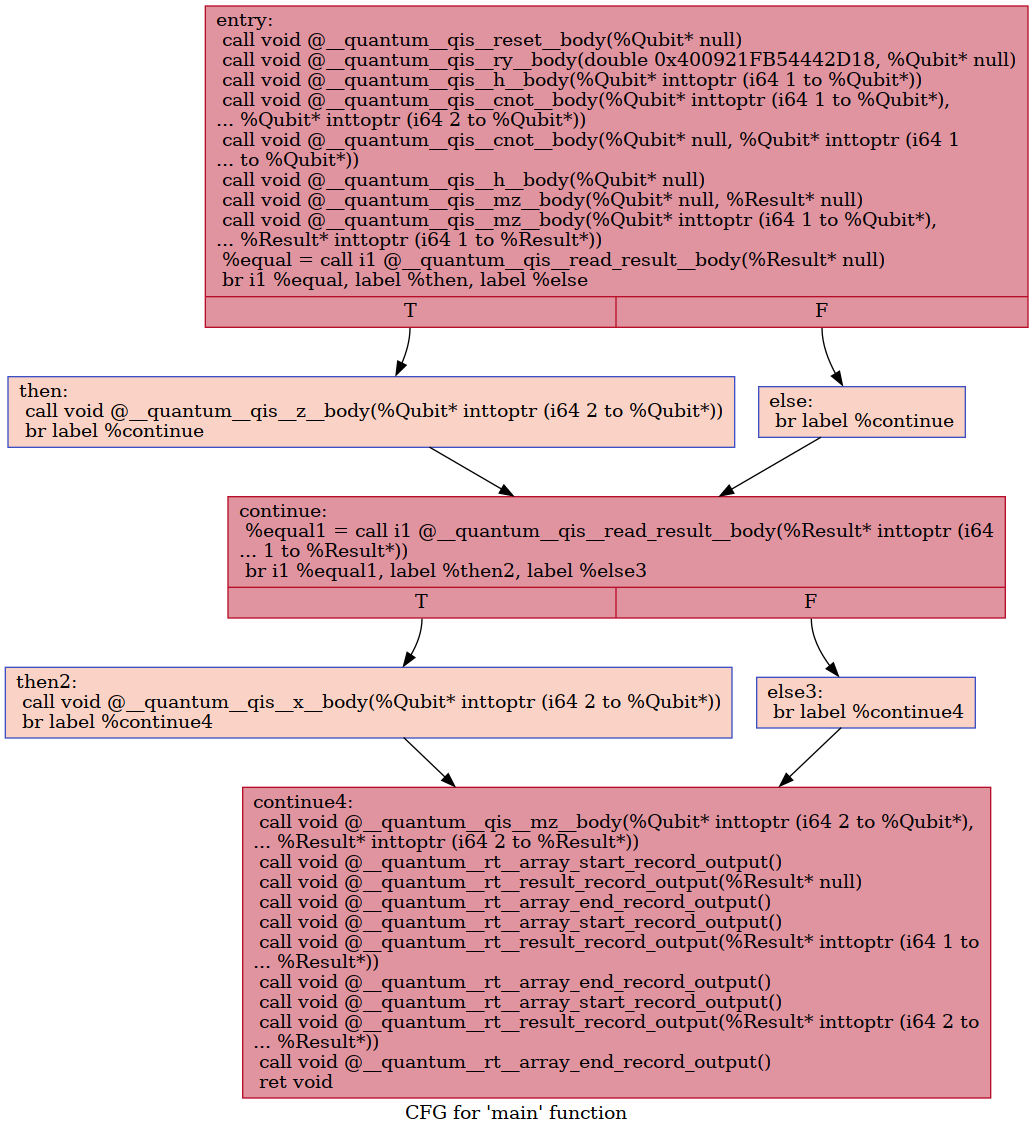

In [13]:
from IPython.display import Image
Image(filename='teleport_qiskit.png') 

# 🚧 under construction 🚧 #

In [11]:
import graphviz
with open('.main.dot', 'r') as file:
    data = file.read()
g = graphviz.Digraph(data, filename='teleport_qiskit.gv')


In [12]:
g.view()

FileNotFoundError: [Errno 2] No such file or directory: 'xdg-open'